In [ ]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1920,
        'height': 1080,
        'scroll': True,
})

# Week 03 (Wednesday), AST 8581 / PHYS 8581 / CSCI 8581 / STAT 8581: Big Data in Astrophysics

### Michael Coughlin <cough052@umn.edu>, Jie Ding <dingj@umn.edu>


With contributions totally ripped off from Phil Marshall and Adam Mantz (SLAC), Gautham Narayan (UIUC), Michael Steinbach (UMN), and Nico Adams (UMN)

# Where are we headed?

Foundations of Data and Probability -> Statistical frameworks (Frequentist vs Bayesian) -> <b> Estimating underlying distributions </b> -> Analysis of Time series (periodicity) -> Analysis of Time series (variability) -> Analysis of Time series (stochastic processes) -> Gaussian Processes -> Decision Trees / Regression -> Dimensionality Reduction -> Principle Component Analysis -> Clustering -> Density Estimation / Anomaly Detection -> Supervised Learning -> Deep Learning -> Introduction to Databases - SQL -> Introduction to Databases - NoSQL -> Introduction to Multiprocessing -> Introduction to GPUs -> Unit Testing

# Recap

* We talked about a frequentist vs Bayesian view of the Universe 
    * frequentist confidence intervals on estimators from a sample vs.
    * Credible regions for the model (meaningless for a frequentist)
* The central role of the likelihood function to both statistical frameworks
* How incorporating prior information causes frequentists and Bayesians to disagree very fundamentally about what "truth" is

# Statistical Frameworks

Goals:

* Explore the relationship between "characterizing the posterior PDF" and "fitting a model to data."

* Understand how to derive maximum likelihood estimators and their confidence intervals

* Be able to compare, contrast and appreciate the Bayesian and Frequentist approaches to statistics

We'll work through a simple Bayesian inference (fitting a straight line and reporting summaries of marginalized posterior PDFs), and then compare with the frequentist procedure of _estimating_ the gradient and intercept and reporting confidence intervals.

# <center> We've only known our Universe is expanding for ~91 years </center>

## Proper motion gives us distances to stars in our own Galaxy from geometry
<center> <img src="./figures/proper_motion.png" width="20%"></center>

You've already seen that stars in our galaxy have different proper motions in homework 01.

## <center> You've also seen that we can measure the brightness of stars (HW 2) </center>

## All stars vary if you look long enough. Some actually pulsate.

<img src='./figures/rspuppis.gif' width="200">

<img src="./figures/hubble_mtwilson.jpg" width="700">

<img src="./figures/HubbleCepheid.jpg" width="600">

<img src="./figures/hubblenotebk.jpg" width="600">

## The period-magnitude relation in Cepheid stars

* Cepheids are stars whose brightness oscillates with a stable period the logarithm of which appears to be strongly correlated with their mean luminosity (or absolute magnitude).

<img width="512" src="./figures/Cepheid-variabledb92-600x461.jpg">

## Why does this make them useful

* A lot of _monitoring_ data - repeated imaging and subsequent "photometry" (which you did in homework 2) of the star - can provide a measurement of the period of the oscillation and their apparent magnitudes

* If you can do this in our Galaxy, you can compare apparent magnitudes to distances from parallax and find a relation - this relation involves the period of the Cepehids. You can therefore define some mean corrected apparent magnitude and together with the distance, you can derive an *absolute magnitude*

* If you measure Cepehids in other galaxies (too far away for parallax distances) then you can assert that those Cepheids are the same as the ones in our Galaxy and therefore have the same absolute magnitude - so now you can get the distances to those galaxies

<img src="./figures/hubble_diagram.jpg" width="600">

<img src="./figures/hubblefindsu.jpg" width="600">

<img src="./figures/distance_ladder.jpg" width="600">

* Let's look at some Cepheid measurements reported by [Riess et al (2011, R11)](https://arxiv.org/abs/1103.2976).  The data are in the form of datapoints, one for each star.

* The periods are well measured (how??? we'll get there!), while the magnitudes come with reported error bars.

<img src="./figures/cepheid_data.png" width=100%>

## The model, and the data

* Let's assume that Cepheid stars' luminosities are related to their oscillation periods by a power law, such that their apparent magnitude and log period follow the linear relation

$\;\;\;\;\;\;\;m = a\;\log_{10} P + b$

* The data consist of *observed magnitudes with quoted uncertainties*, such as: 

$\;\;\;\;\;\;\;m^{\rm obs} = 24.51 \pm 0.31$ at $\log_{10} P = \log_{10} (13.0/{\rm days})$

## Bayesian inference

* We compute the posterior PDF for the parameters $a$ and $b$ given the data and the assumed model $H$: 

$\;\;\;\;\;P(a,b|\boldsymbol{m}^{\rm obs},H) \propto P(\boldsymbol{m}^{\rm obs}|a,b,H)\;P(a,b|H)$

* We can evaluate the unnormalized posterior PDF on a grid, renormalize it numerically, and then visualize and summarize the resulting 2D function.

## Probabilistic graphical model

* A probabilistic graphical model is a way of representing how we build the model of the data

* Let's draw a PGM for this inverse problem, imagining our way through what we would do to generate a mock dataset like the one we have from R11.

* If we were generating mock data, then for any plausible choice of parameters $a$ and $b$ we can predict the true magnitude $m_k$ of each star given its period $P_k$, and then add noise to simulate each observed magnitude $m^{\rm obs}_k$.


## PGM

<img width="400" src="./figures/pgms_cepheids.png"/>

> NB. The magnitude uncertainties $\sigma^{\rm obs}$ are given to us in the data file; we can use them as-is if we believe them. The "true" magnitudes $m$ are _determined_ by our power law model.

## Building an inference

Now let's assign PDFs for each node in the PGM, and derive the unnormalized posterior PDF for $a$ and $b$.

We'll need:

* The sampling distribution: $P(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},H)$

* The conditional PDF for the latent variables $m_k$, $P(m_k|a,b,\log_{10}{P_k},H)$

* A prior PDF for our parameters: $P(a,b|H)$

## The sampling distribution $P(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},H)$

We were given points ($m^{\rm obs}_k$) with error bars ($\sigma_k$), which suggests a *Gaussian* sampling distribution for each one:

$\;\;\;\;\;\;\;P(m^{\rm obs}_k|m_k,\sigma_k,H) = \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp{-\frac{(m^{\rm obs}_k - m_k)^2}{2\sigma_k^2}}$

> Note that we are never _given_ the form of the sampling distribution: it always has to be assumed. 

> A Gaussian will turn out to be a good choice in a number of cases where the problem has some true "variance" or dispersion ($\sigma$) - even if you don't know what that is, because of a principle called maximum entropy. This sort of setting is common in the real world (see the Central Limit Theorem) and maximizing the entropy minimized the amount of prior information built into the posterior distribution.

If we assume that the measurements of each Cepheid start are *independent* of each other, then we can define *predicted and observed data "vectors"* $\boldsymbol{m}$ and $\boldsymbol{m}^{\rm obs}$ (plus a corresponding observational uncertainty "vector" $\boldsymbol{\sigma}$) and compute the joint sampling distribution as:

$\;\;\;\;\;\;\;P(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},\boldsymbol{\sigma},H) = \prod_k P(m^{\rm obs}_k|m_k,\sigma_k,H)$

## The conditional PDF $P(m_k|a,b,\log_{10}{P_k},H)$ 

Our relationship between the intrinsic magnitude and the log period is linear and _deterministic_, indicating the following *delta-function* PDF:

$\;\;\;\;\;\;\;P(m_k|a,b,\log_{10}{P_k},H) = \delta(m_k - a\log_{10}{P_k} - b)$

<img width="300" src="./figures/pgms_cepheids.png"/>

## The resulting joint likelihood, $\mathcal{L}(a,b;\boldsymbol{m}^{\rm obs}) = P(\boldsymbol{m}^{\rm obs}|a,b,H)$

The PDF for everything inside the PGM plate is the following product:

$\;\;\;\;\;\;\;P(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},\sigma,H)\;P(\boldsymbol{m}|a,b,H)$

$\;\;\;\;\;\;\;\;\;\;\;\;\;\; = \prod_k P(m^{\rm obs}_k|m_k,\sigma_k,H)\;\delta(m_k - a\log_{10}{P_k} - b)$

## Marginalizing out the latent variables

The intrinsic magnitudes of each Cepheid $m_k$ are "latent variables," to be _marginalized out_:

$\;\;\;\;\;\;\;P(\boldsymbol{m}^{\rm obs}|a,b,H) = \int P(\boldsymbol{m}^{\rm obs}|\boldsymbol{m},\sigma,H)\;P(\boldsymbol{m}|a,b,H)\; d\boldsymbol{m}$

$\;\;\;\;\;\;\;\;\;\;\;\;\;\; = \prod_k \int P(m^{\rm obs}_k|m_k,\sigma_k,H)\;\delta(m_k - a\log_{10}{P_k} - b) dm_k$

$\;\;\;\;\;\;\; \longrightarrow P(\boldsymbol{m}^{\rm obs}|a,b,H) = \prod_k P(\boldsymbol{m}^{\rm obs}_k|(a\log{P_k} + b),\sigma_k,H)$

## The log likelihood

Taking logs, for numerical stability, the product in the joint likelihood becomes the following sum:

$\;\;\;\;\;\;\;\log P(\boldsymbol{m}^{\rm obs}|a,b,H) = \sum_k \log P(m^{\rm obs}_k|(a\log{P_k} + b),\sigma,H)$

which, substituting in our Gaussian form, gives us: 

$\;\log P(\boldsymbol{m}^{\rm obs}|a,b,H) = -\frac{1}{2}\sum_k \log{2\pi\sigma_k^2} - \frac{1}{2} \sum_k \frac{(m^{\rm obs}_k - a\log{P_k} - b)^2}{\sigma_k^2}$

> Note that the log likelihood $\log P(\boldsymbol{m}^{\rm obs}|a,b,H)$ is a function, $\log \mathcal{L}(a,b;\boldsymbol{m}^{\rm obs})$ that can be evaluated, as a function of $a$ and $b$, at constant $\boldsymbol{m}^{\rm obs}$

## The Chi-squared misfit statistic

Astronomers often call the term in the log likelihood that depends on the parameters $\chi^2$ ("chi-squared"):

$\;\;\;\;\;\;\;\chi^2 = \sum_k \frac{(m^{\rm obs}_k - a\log{P_k} - b)^2}{\sigma_k^2}$

$\chi^2$ is a "misfit" statistic, that quantifies the difference between "observed and predicted data." Under our assumptions, it's equal to -2 times the log likelihood (up to a constant). The "predicted data" are $m_k = a\log{P_k} - b$

## Including the prior $P(a,b|H)$

* Let's assume  the prior PDFs for $a$ and $b$ to be independent, such that $P(a,b|H) = P(a|H)P(b|H)$.

* For now, let's assume uniform prior PDFs for both $a$ and $b$, supposing that we know roughly what size they are:

$\;\;\;\;\;\;\;P(a|H) = \frac{1}{a_{\rm max} - a_{\rm min}}$ with $(a_{\rm min}, a_{\rm max}) = (-10, 10)$

$\;\;\;\;\;\;\;P(b|H) = \frac{1}{b_{\rm max} - b_{\rm min}}$ with $(b_{\rm min}, b_{\rm max}) = (10, 30)$

* This is literally what you've been doing by evaluating on a grid of points

## Putting it all together

The joint PDF is:

$\;\;\;\;\;\;\;P(\boldsymbol{m}^{\rm obs},a,b|H) = P(\boldsymbol{m}^{\rm obs}|a,b,H) P(a|H) P(b|H)$

> Since we marginalized out the $m$, analytically, we _could_ have drawn the PGM more simply, jumping directly to $P(\boldsymbol{m}^{\rm obs}|a,b,H)$. However, it's often helpful to _explicitly_ distinguish between "true" parameters and latent ones.

## Characterizing the posterior PDF

With the completed factorization of the joint PDF for all variables, we have the following product: 

$\;\;P(a,b|\boldsymbol{m}^{\rm obs},H) \propto P(\boldsymbol{m}^{\rm obs}|a,b,H) P(a|H) P(b|H)$

We can evaluate the posterior PDF $P(a,b|\boldsymbol{m}^{\rm obs},H)$ for any choice of parameters $(a,b)$, up to a normalization constant.

## Posterior Evaluation on a Grid

* Our 2-D posterior PDF can be visualized as a contour plot

* We can choose contours that display the _credible regions_ that enclose 68% and 95% of the posterior probability.

* _Given our assumption that the model is true, the probability that the true values of the model parameters lie within the 95% credible region given the data is 0.95._

<img src="./figures/cepheids_2d-posterior.png" width=60%>

## Summarizing our inferences

* Typically, we will want to (or will be expected to) report "answers" for our model parameters

* This can be difficult: our result _is_ the posterior PDF for the model parameters given the data!

* A convenient, and in this case appropriate, choice is to report quantiles of the 1D marginalized PDFs

> In general, the most important thing when summarizing inferences is to state clearly what you are doing, preferably with critical commentary

## 1D marginalized posterior PDFs

<img src="./figures/cepheids_1d-posteriors.png">

Let's define the 68% credible interval as the range between the 16th and 84th percentile, and quote it as an (asymmetric) "error bar" on the 1-D posterior medians:

$a = -2.95^{+0.06}_{-0.06} \;\;\;\;\;\;\; b =  26.27^{+0.09}_{-0.1} $

## Notes on summaries of marginal PDFs 

* In this simple case, our report makes sense: the medians of both 1D marginalized PDFs lie within the region of high 2D posterior PDF. *This will not always be the case.*


* The marginalized 1-D posterior for $x$ has a well-defined meaning, regardless of the higher dimensional structure of the joint posterior:  it is $P(x|d,H)$, the PDF for $x$ given the data and the model, and *accounting for the uncertainty in all other parameters*.


* The posterior PDF we computed is close to, but not quite, a bivariate Gaussian. 

**Question: What choice of (proper) prior would we have had to make in order for the posterior PDF to be _exactly_ Gaussian?**

## Post-inference model checking


It's always a good idea to check that the inferred parameter values are sensible: look at the model predictions in data space.

$\longrightarrow$ Let's overlay the model period-magnitude relation defined by the 1-D posterior median parameter values on the data.

<img src="./figures/cepheids_posterior-median-check.png">

## "Fitting the data"

* The Bayesian solution is not a single set of "best-fit" parameters. 

* We can think of the posterior PDF as providing us with a continuous distribution of model fits that are _plausible_ given the data and our assumptions.

* There are other ways of defining the parameters that _best fit_ the data: the primary one is "the method of Maximum Likelihood"

## In-class Exercise: Computing the Bayesian Posterior PDF
Computing the Bayesian Posterior PDF

Here's how the figures for the Bayesian inference were made - starting with the functions for the log likelihood, the log prior, and the unnormalized log posterior, evaluated on a 2D $(a,b)$ parameter grid given the R11 data.

$\;\log P(\boldsymbol{m}^{\rm obs}|a,b,H) = -\frac{1}{2}\sum_k \log{2\pi\sigma_k^2} - \frac{1}{2} \sum_k \frac{(m^{\rm obs}_k - a\log{P_k} - b)^2}{\sigma_k^2}$

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# Data ingest and visualization class
# ----------------------------------------------------------------------

class Cepheids(object):
    """
    Methods for reading in and visualizing the R11 cepheids dataset.
    """
    def __init__(self, filename):
        # Read in the data and store it in this master array:
        self.data = np.loadtxt(filename)
        self.hosts = self.data[:,1].astype('int').astype('str')
        # We'll need the plotting setup to be the same each time we make a plot:
        colornames = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'violet', 'magenta', 'gray']
        self.colors = dict(zip(self.list_hosts(), colornames))
        self.xlimits = np.array([0.3, 2.3])
        self.ylimits = np.array([30.0, 17.0])
        self.redshifts = {}
        self.redshifts['1309'] = 0.007125
        self.redshifts['3021'] = 0.005140
        self.redshifts['3370'] = 0.004266
        self.redshifts['3982'] = 0.003699
        self.redshifts['4038'] = 0.005477
        self.redshifts['4258'] = 0.001494
        self.redshifts['4536'] = 0.006031
        self.redshifts['4639'] = 0.003395
        self.redshifts['5584'] = 0.005464
        return

    def list_hosts(self):
        # The list of (9) unique galaxy host names:
        return np.unique(self.hosts)

    def select(self, ID):
        # Pull out one galaxy's data from the master array:
        index = (self.hosts == str(ID))
        self.mobs = self.data[index, 2]
        self.sigma = self.data[index, 3]
        self.logP = np.log10(self.data[index, 4])
        return

    def plot(self, X, normed=False):
# Plot all the points in the dataset for host galaxy X.
        ID = str(X)
        self.select(ID)
        plt.rcParams['figure.figsize'] = (15.0, 8.0)
        plt.rc('xtick', labelsize=16)
        plt.rc('ytick', labelsize=16)
        if normed:
            D = self.redshifts[ID]*3.e5/(70.)
            y = self.mobs-np.log10(D)-25
        else:
            y = self.mobs
        plt.errorbar(self.logP, y, yerr=self.sigma, fmt='.', ms=7, lw=1, color=self.colors[ID], label='NGC'+ID)
        plt.xlabel('$\\log_{10} P / {\\rm days}$', fontsize=20)
        if normed:
            plt.ylabel('${\\rm absolute magnitude}$', fontsize=20)
        else:
            plt.ylabel('${\\rm magnitude (AB)}$', fontsize=20)
        plt.xlim(self.xlimits)
        if normed:
            plt.ylim([0,-7])
        else:
            plt.ylim(self.ylimits)
        plt.title('Cepheid Period-Luminosity (Riess et al 2011)', fontsize=20)
        return

    def overlay_straight_line_with(self, a=0.0, b=24.0, label=None, silent=False, alpha=0.7, color="k"):
        x = self.xlimits
        y = a*x + b
        plt.plot(x, y, '-',color=color, lw=2, label=label,alpha=alpha)
        plt.xlim(self.xlimits)
        return

    def add_legend(self):
        plt.legend(loc='upper left')
        return

    def save_png(self):
        plt.savefig('cepheid_data.png', dpi=300)
        return

    def sufficient_statistics(self):
        x = self.logP
        y = self.mobs
        sigma = self.sigma
        w = 1.0 / sigma**2
        So = np.sum(w)
        Sx = np.sum(w * x)
        Sy = np.sum(w * y)
        Sxy = np.sum(w * x * y)
        Sxx = np.sum(w * x * x)
        Matrix = np.array([[Sxx, Sx], [Sx, So]])
        vector = np.array([Sxy, Sy])
        return Matrix, vector

    def negative_log_likelihood(self, theta):
        """
        Computes -log L(theta)

        Parameters
        ----------
        theta : float, ndarray
            parameters being fitted, (a,b)

        Returns
        -------
        0.5 * chisq
        """
        a, b = theta[0], theta[1]
        chisq = np.sum(((self.mobs - a * self.logP - b) / self.sigma)**2)
        return 0.5 * chisq

# ----------------------------------------------------------------------
# Data analysis functions
# ----------------------------------------------------------------------

def plot_1d_marginalized_pdfs(a, b, Pa, Pb):
    """
    Plot both 1D marginalized posterior distributions for the straight
    line modeling of a Cepheid dataset

    Parameters
    ----------
    a : float, ndarray
        slope parameter array
    b : float, ndarray
        intercept parameter array
    Pa : float, ndarray
        P(slope) PDF array
    Pb : float, ndarray
        P(intercept) PDF array
    """
    fig, (left, right) = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15, 6)
    plt.subplots_adjust(wspace=0.2)

    left.plot(a, prob_a_given_data)
    left.set_title('$P(a|m^{obs})$', fontsize=20)
    left.set_xlabel('slope $a$', fontsize=20)
    left.set_ylabel('Posterior probability density', fontsize=20)

    right.plot(b, prob_b_given_data)
    right.set_title('$P(b|m^{obs})$', fontsize=20)
    right.set_xlabel('intercept $b$ / AB magnitudes', fontsize=20)
    right.set_ylabel('Posterior probability density', fontsize=20)

    return


def compress_1D_pdf(x, pr ,ci=68.3, dp=1):
    """
    Compress a 1D PDF into a median and 68% credible interval

    Parameters
    ----------
    x : float, ndarray
        parameter array
    pr : float, ndarray
        pdf array
    ci : float
        credible interval width
    dp : int
        number of decimal places to report to

    Returns
    report : string
        latex formatted parameter statement
    """
    # Interpret credible interval request:
    low  = (1.0 - ci/100.0)/2.0    # 0.16 for ci=68
    high = 1.0 - low               # 0.84 for ci=68

    # Find cumulative distribution and compute percentiles:
    cumulant = pr.cumsum()
    pctlow = x[cumulant>low].min()
    median = x[cumulant>0.50].min()
    pcthigh = x[cumulant>high].min()

    # Convert to error bars, and format a string:
    errplus = np.abs(pcthigh - median)
    errminus = np.abs(median - pctlow)

    report = "$ "+str(round(median,dp))+"^{+"+str(round(errplus,dp))+"}_{-"+str(round(errminus,dp))+"} $"

    return report


$\;\log P(\boldsymbol{m}^{\rm obs}|a,b,H) = -\frac{1}{2}\sum_k \log{2\pi\sigma_k^2} - \frac{1}{2} \sum_k \frac{(m^{\rm obs}_k - a\log{P_k} - b)^2}{\sigma_k^2}$

In [85]:
import matplotlib.pyplot as plt
import math
import numpy as np
exec(open('cepheids.py').read())
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)

data = Cepheids('data/R11ceph.dat')

def log_likelihood(logP, mobs, sigma, a, b):
    # YOUR CODE HERE
    return -0.5*(sum(np.log(2*math.pi*(sigma**2)))+sum((mobs-a*logP-b)**2/sigma**2))
    pass

def log_prior(a, b):

    amin,amax = -10.0,10.0
    bmin,bmax = 10.0,30.0
    
    if((amin<a<amax) & (bmin<b<bmax)):
        value = 0
    else:
        value = -np.inf

    # YOUR CODE HERE
    # prior is: 1 if bmin < b < bmax, 0 otherwise
    # prior is: 1 if amin < a < amax, 0 otherwise
    # remember to take a log...
    
    # if done, also try Cauchy distribution for b, equivalent to uniform
    # in angle of orientation of line
    #value = np.log(1.0/(bmax-bmin)) - np.log(np.pi) - np.log(1 + a**2)
    
    return value

def log_posterior(logP, mobs, sigma, a, b):
    return log_likelihood(logP,mobs,sigma,a,b) + log_prior(a,b)

## Evaluating the posterior PDF

Now, let's set up a suitable parameter grid, evaluate the unnormalized log posterior on it, and then renormalize it numerically.

In [63]:
# Limits of parameter grids, focused on the high likelihood region:
amin, amax = -3.4, -2.4
bmin, bmax = 25.7, 26.8
limits = (amin, amax, bmin, bmax)

def evaluate_posterior_on_a_grid(limits, NGC_ID=4258, npix=100):
    data.select(NGC_ID)
    # Make grids:
    amin, amax, bmin, bmax = limits
    agrid, bgrid, logprob = np.linspace(amin,amax,npix), np.linspace(bmin,bmax,npix), np.zeros([npix,npix])

    # Loop over parameters, computing unnormlized log posterior PDF:
    for i,a in enumerate(agrid):
        for j,b in enumerate(bgrid):
            logprob[j,i] = log_posterior(data.logP, data.mobs, data.sigma, a, b)

    # Exponentiate and normalize to get posterior density:
    # YOUR CODE HERE
    print(logprob)
    prob = np.exp(logprob - np.max(logprob))
    prob /= np.sum(logprob)
    
    return prob, agrid, bgrid

In [69]:
%%time

prob, a, b = evaluate_posterior_on_a_grid(limits, NGC_ID=4258, npix=100)

[[-2445.98285191 -2398.86540389 -2352.33930518 ...  -628.91278748
   -639.15622265  -649.99100714]
 [-2412.37497078 -2365.6699955  -2319.55636954 ...  -635.31476272
   -645.97067064  -657.21792788]
 [-2379.06831277 -2332.77581025 -2287.07465703 ...  -642.01796109
   -653.08634176  -664.74607174]
 ...
 [ -588.51325701  -581.40566536  -574.88942303 ... -2652.39926084
  -2702.6525524  -2753.49719326]
 [ -584.1240191   -577.4289002   -571.32513061 ... -2688.01987931
  -2738.68564361 -2789.94275722]
 [ -580.03600432  -573.75335817  -568.06206132 ... -2723.94172091
  -2775.01995795 -2826.68954431]]
CPU times: user 231 ms, sys: 4.14 ms, total: 235 ms
Wall time: 235 ms


In [70]:
prob

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -1.32727277e-51, -4.72381424e-56, -9.30691388e-61],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -2.20098794e-54, -5.18579868e-59, -6.76384892e-64],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -2.70057101e-57, -4.21229668e-62, -3.63716130e-67],
       ...,
       [-4.65857766e-34, -5.68906860e-31, -3.84599982e-28, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.75383468e-32, -3.03478784e-29, -1.35819393e-26, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-2.23808926e-30, -1.19783213e-27, -3.54890825e-25, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

## Visualizing the 2D PDF

* Typically we want to be able to see the centroid, size and shape of the posterior PDF

* In particular we want to see the _credible regions_ that enclose 68% and 95% of the posterior probability. These are best plotted as contours

* Given our assumption that the model is true, the probability that the true values of the model parameters lie within the 95% credible region given the data is 0.95

Text(0, 0.5, 'intercept b / AB magnitudes')

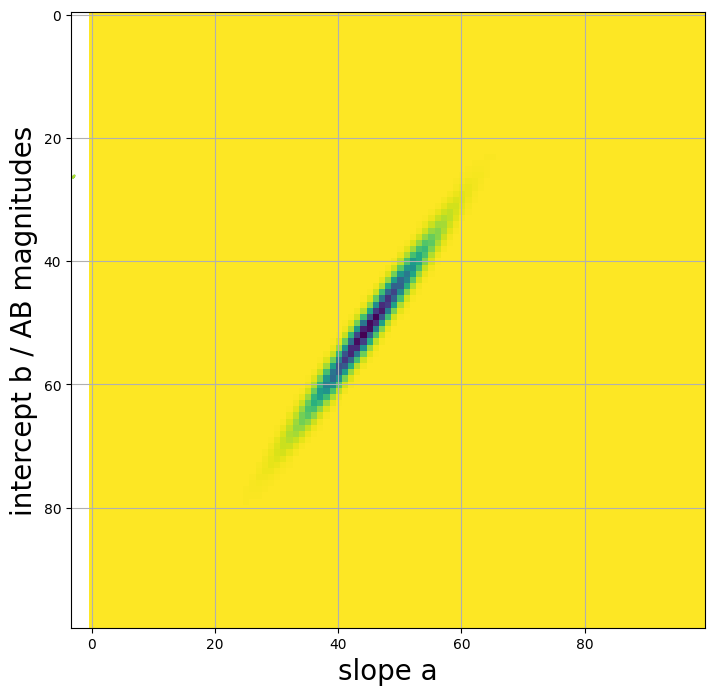

In [75]:
sorted = np.sort(prob.flatten())
C = sorted.cumsum()

# Find the pixel values that lie at the levels that contain 68% and 95% of the probability:
#lvl68 = np.min(sorted[C > (1.0 - 0.68)])
#lvl95 = np.min(sorted[C > (1.0 - 0.95)])

# YOUR CODE HERE
plt.figure()
#plt.scatter(a,b)
plt.imshow(prob)
plt.contour(a,b,prob)
plt.grid()
plt.xlabel('slope a', fontsize=20)
plt.ylabel('intercept b / AB magnitudes', fontsize=20)

## Summarizing our inferences

Let's compute the 1D marginalized posterior PDFs for $a$ and for $b$, and report the median and "68% credible interval" (defined as the region of 1D parameter space enclosing 68% of the posterior probability).

(100,) -7.864161335663709e-06


ValueError: zero-size array to reduction operation minimum which has no identity

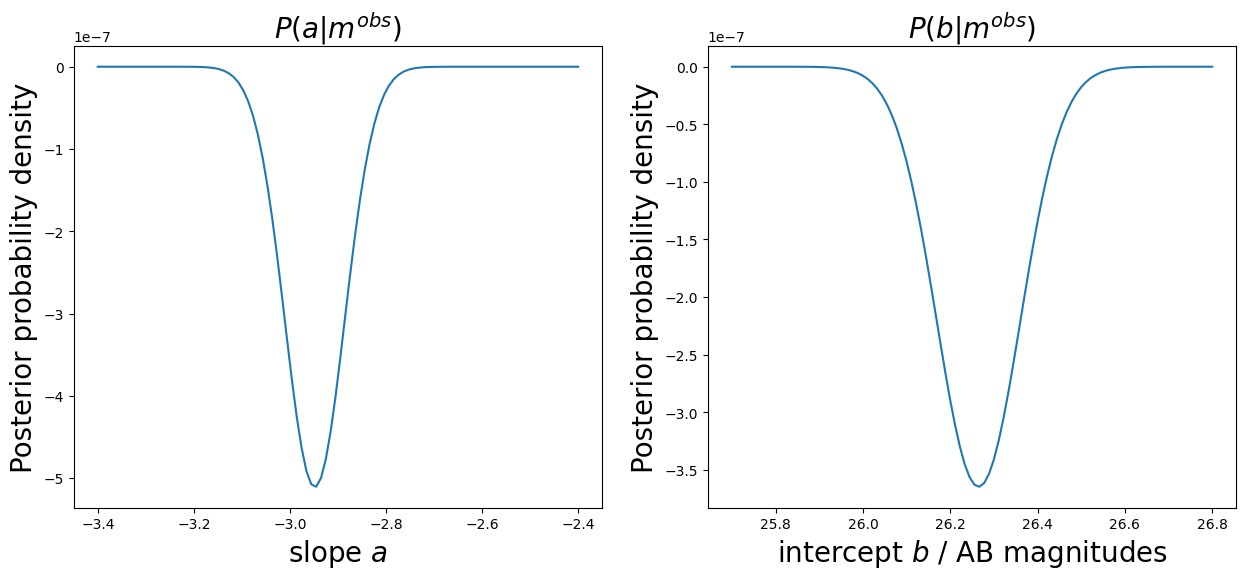

In [77]:
prob_a_given_data = np.sum(prob, axis=0) # Approximate the integral as a sum
prob_b_given_data = np.sum(prob, axis=1) # Approximate the integral as a sum

# Check that we do have a 1D PDF:
print(prob_a_given_data.shape, np.sum(prob_a_given_data))

plot_1d_marginalized_pdfs(a, b, prob_a_given_data, prob_b_given_data)

# plt.savefig("cepheids_1d-posteriors.png")

print("a = ",compress_1D_pdf(a, prob_a_given_data, ci=68, dp=2))
print("b = ",compress_1D_pdf(b, prob_b_given_data, ci=68, dp=2)) 

## Post-inference model checking


Are these inferred parameters sensible? 

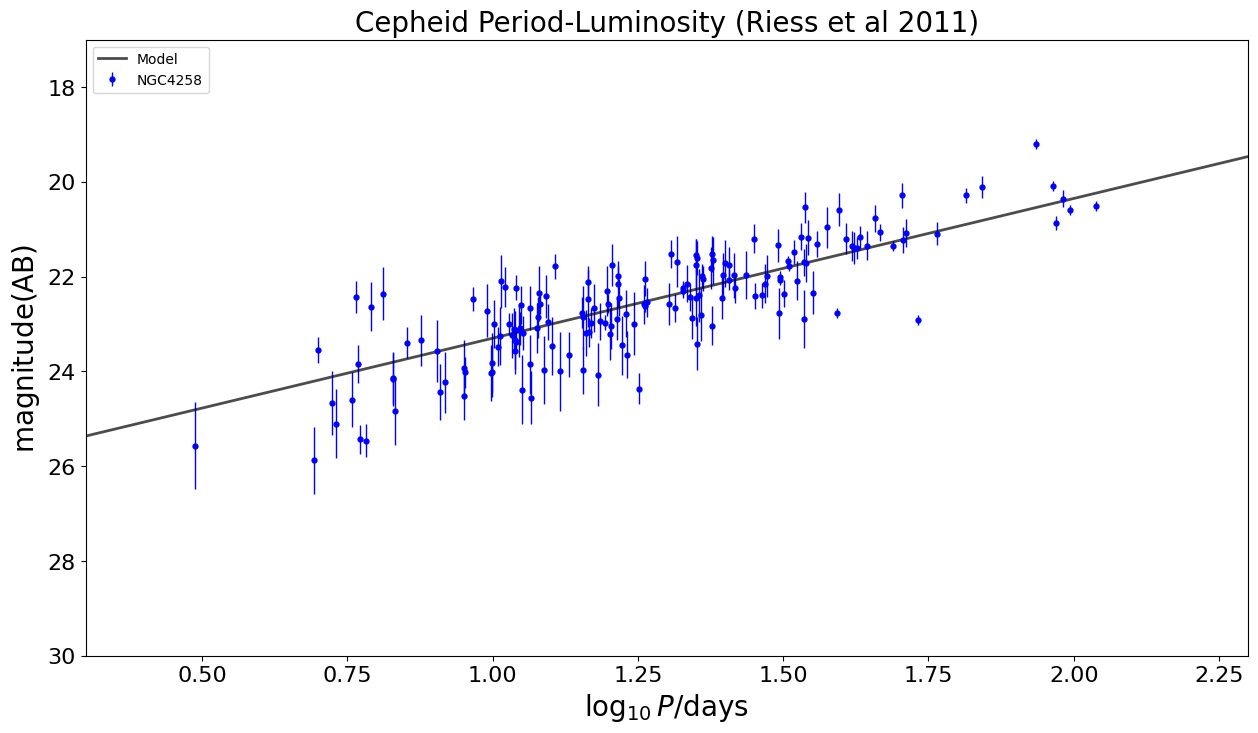

In [78]:
data.plot(4258)

data.overlay_straight_line_with(a=-2.95, b=26.25, label='Model')

data.add_legend()

# plt.savefig("cepheids_posterior-median-check.png")

## In-class Exercise: Finding the Maximum likelihood parameters

Here's the code to find the maximum likelihood parameters in the Cepheid problem.

In [87]:
exec(open('cepheids.py').read())
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)

data = Cepheids('data/R11ceph.dat')

In [82]:
import scipy 
from scipy import optimize


TypeError: 'module' object is not callable

In [ ]:
data.select(4258)
from scipy import optimize

### YOUR CODE HERE
M, v = optimize()
a, b = ...
print('$ \hat{a} = %.2f $' % np.round(a, 2))
print('$ \hat{b} = %.2f $' % np.round(b, 2))

ValueError: operands could not be broadcast together with shapes (100,) (2,) 

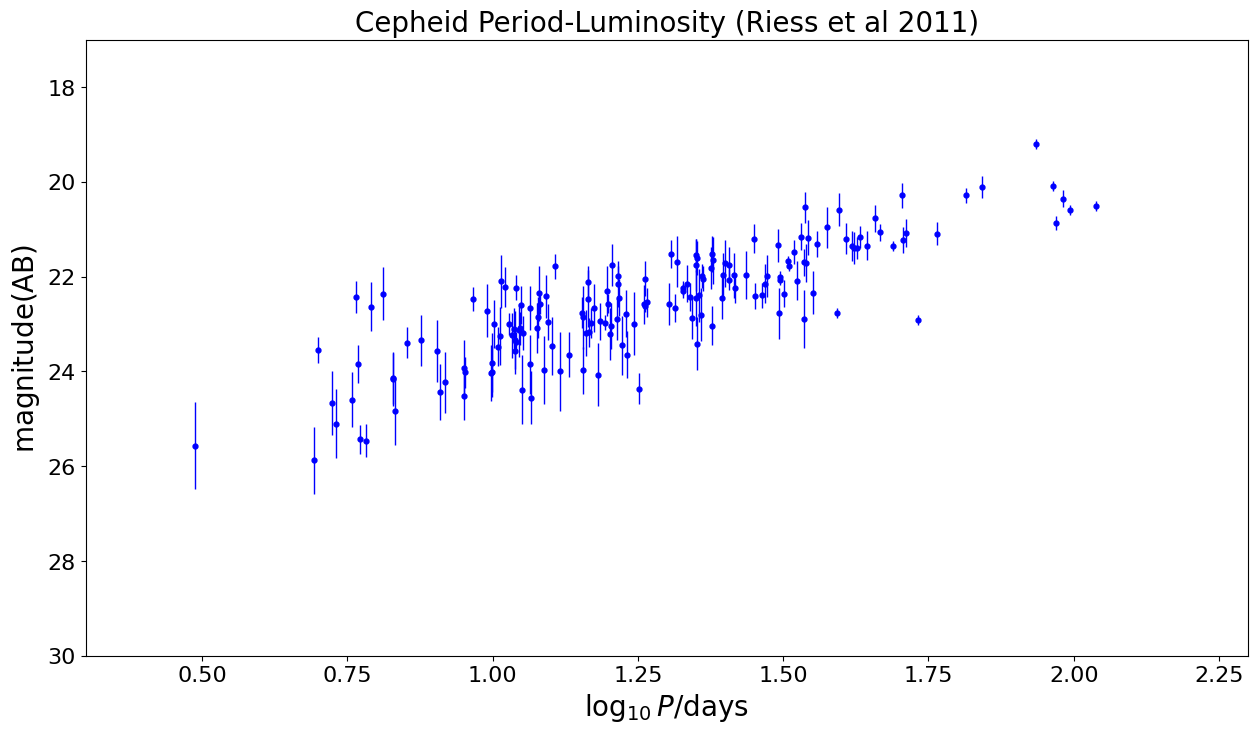

In [88]:
data.plot(4258)

data.overlay_straight_line_with(a=a, b=b, label='Maximum Likelihood fit')

data.add_legend()

## The covariance of MLEs

Here's code to compute the inverse Hessian of the log likelihood, and hence a lower limit on the covariance of the ML estimators. The diagonal elements of the covariance matrix give an approximate symmetrical error bar.

In [89]:
# Generalized maximum likelihood approach:

import scipy.optimize

pars = np.array([0.0, 20])
result = scipy.optimize.minimize(data.negative_log_likelihood, pars, method='BFGS', tol=0.001)

print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 544.3090872704097
        x: [-2.948e+00  2.626e+01]
      nit: 5
      jac: [ 7.629e-06  0.000e+00]
 hess_inv: [[ 3.845e-03 -5.791e-03]
            [-5.791e-03  9.132e-03]]
     nfev: 18
     njev: 6


In [90]:
C = result.hess_inv
np.sqrt(C[0,0]), np.sqrt(C[1,1])

(0.06200447844283217, 0.09556286851275143)

# Priors

A **prior** is the probability of the parameters *without* any data
* **this is a subjective choice which we get to make!**
* it is your degree of belief in the model
* the posterior is your degree of belief in the model, updated by the data you observed

We generally want to pick a prior that is "weak" or "uninformative"
* In the case of "big" enough data, the prior shouldn't matter
* It is precisely when we do not have big enough data that we rely on the prior      

MLE is a special case of maximum *a posteriori* inference with a uniform/flat prior

 # <center> We already know the prior can alter the inference we make, but just to drive home the point... </center>

## In class warm-up: Is the choice of a uniform prior actually uninformative?

**Task:** Draw 1000 random values for $a$ from a uniform distribution U(-10, 10), which means a top-hat function between -10 and 10. Then, for each $a$, plot the line $y = ax$ (over $-1 < x < 1$).

In [1]:
# YOUR CODE HERE  

a = np.arange(0., 10, 0.1)
x = np.array([-1, 1])
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

for m in a:
    ax.plot(...
    

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')   

## How to pick a prior 

### Bayesian priors

Priors can be **informative** or **uninformative**.  As it sounds, informative priors are based on existing information (including previously obtained data, but not the data considered right now) that might be available.  Uniformative priors can be thought of as "default" priors, i.e., what your prior is when you never used
any data, e.g, a "flat" prior like $p(\theta|M,I) \propto {\rm C}$.

## Statistical Modeling "Wisdom"

* Build a model for your data (ideally draw a "Probabilistic Graphical Model" or PGM - we'll see more of these)

* Have an objective function (likelihood or posterior) that you optimize (or sample) to fit the the data

    * The objective function evaluates the fit of your one dataset under different parameter values/models
 
* Derive your objective function from modeling assumptions (physical or statistical)

* **Write down your assumptions!!!** (You'll need these when things go wrong)

## Statistical Modeling "Wisdom"

Four Questions for a Bayesian:

1. What is the model? $P(D|\theta)$

2. What is the likelihood? Derive $L(\theta)$ from your sampling distribution $P(D|\theta)$

3. What are your priors? $P(\theta)$

4. How do you optimize/sample the objective function to model the data?

So far, we've restricted ourselves to inferences with:
* exact solutions - rare!
* linear-izable functions - because these are convex, and minimum is the global minimum!
* low-dimensional parameter spaces - limiting!

We can think of more complicated scenarios:

![Posteriors](figures/posteriors.png)

# Global Optimizers (use if you have a complex problem but low dimensionality)


A "global optimizer" finds global minima of functions. These generally use a two stage approach. The first stage takes large steps in parameter space to avoid getting stuck in local minima. Then, the second stage finds local minima near the best of the big steps.

# Simulated annealing

Simulated annealing mimics the physical process of heating a material and then slowly lowering the temperature to decrease defects, thus minimizing the system energy.

At each iteration of the simulated annealing algorithm, a new point is randomly generated. 

The distance of the new point from the current point, or the extent of the search, is based on a probability distribution 

## $$ P = \exp(-\Delta L/kT) $$



The algorithm accepts all new points that lower the objective, but also, with a certain probability, points that raise the objective. 

By accepting points that raise the objective, the algorithm avoids being trapped in local minima, and is able to explore globally for more possible solutions.

![Simulated Annealing](figures/sim_annealing_flow.png)


An annealing schedule is selected to systematically decrease the temperature as the algorithm proceeds. 

As the temperature decreases, the algorithm reduces the extent of its search to converge to a minimum.

Basin-hopping algorithm is a stochastic algorithm that seeks a global minimum by combining random perturbation of the positions and local minimization.

`scipy.optimize.basinhopping`

![Basin Hopping](figures/basin_hopping.jpg)

Simplicial homology global optimization (SHGO) is another good option, particularly since it also returns all other local and global minimum in addition to the global minimum. 

It's using "novel, rigorously proven" methods that detect the homological properties of the objective function surface). 

<img src="./figures/shgo.svg" width="600">

## In-class Exercise: Use Basin-hopping, simulated annealing and SHGO to solve the eggholder problem

In [103]:
class MyBounds(object):
    def __init__(self, xmax=[512, 512], xmin=[-512,-512] ):
        self.xmax = np.array(xmax)
        self.xmin = np.array(xmin)
    def __call__(self, **kwargs):
        x = kwargs["x_new"]
        tmax = bool(np.all(x <= self.xmax))
        tmin = bool(np.all(x >= self.xmin))
        return tmax and tmin

bounds = MyBounds()
#eh = eggholder
res1 = optimize.basinhopping(eggholder,x0=[0],niter=200)
print('Basin Hopping')
print(res1)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
print('-------------')
res2 = optimize.shgo(...
print('SHGO')
print(res2)

# Curse of Dimensionality

<img src="./figures/ndim.png" width="400">

In general, evaluating the posterior throughout the entire parameter space is too costly. 

We want to focus resources on mapping the posterior where it is non-tiny. 

**Generating samples from the posterior itself automatically accomplishes this.**

### Sampling and numerical integration

Almost always, we are ultimately interested in *integrals* of the posterior, i.e. marginal distributions of parameters. The tasks of Monte Carlo sampling and **Monte Carlo integration** are essentially indistinguishable. (Similar machinery is useful for difficult optimization problems.)

The essence of MC integration:

$\int w(x)\,p(x)\,dx = \int w(x)\,dP(x) \approx \overline{w(x_i)}; ~ x_i\sim P$

i.e., if we can factor the integrand into a PDF and a weight, and sample from the PDF, then our integral becomes an _average over the samples_.

In other words, given a list of samples of $\theta$ from $p(\theta)$,
* the marginalized 1D posterior for $\theta_0$ is estimated by making a histogram of $\theta_0$ samples
* the marginalized 2D posterior for $\theta_0,\theta_1$ is estimated from a 2D histogram of $\theta_0,\theta_1$ samples
* statistics like the mean or percentiles of the posterior are estimated directly from the samples

All of these computations would be weighted if $w(\theta)\neq1$.

# Simple Example

Area of a rectangle = Base $\times$ Height
Area of a triangle = 1/2 Base $\times$ Height
What about the area of this?

<img src="./figures/messy_area.png" width="600">

<img src="./figures/conditional_prob2.png" width="700">

## Simple Monte Carlo

A posterior is already naturally factored into a likelihood function, $p(x|\theta)$, and a prior PDF, $p(\theta)$:

$p(\theta|x) \propto p(x|\theta)\,p(\theta)$

Applying this in the MC integration context leads to the Simple Monte Carlo algorithm:

```
while we want more samples
    draw theta from p(theta)
    compute weight = p(x|theta)
    store theta and weight
```

Obtaining marginal distribution(s) for $\theta$ then reduces to constructing weighted histograms of the samples.

SMC is indeed simple (as long as the prior is simple to draw from), but if the priors are not very informative then it still wastes many likelihood evaluations where the posterior is small. However, refinements of this approach lead to some of the advanced algorithms we'll cover later.

For now, we'll focus on the most common methods, which use a unit weight function (i.e. obtain draws directly from the posterior).

But first, a bit more context re: random number generation.

## Random number generation
Useful terms to know:

* Random: predictable only in the sense of following a PDF

* Pseudorandom: not random, but "unpredictable enough" for practical purposes. Various computer algorithms produce pseudorandom sequences that approximate the uniform distribution on [0,1).

* Quasirandom: sequence that doesn't even pretend to be random, but does converge to a target PDF *more quickly* than a random or pseudorandom process would

Here we assume that we have a reliable source of uniform pseudorandom numbers, and want to turn these into samples of another PDF.

Two simple approaches are
1. Rejection sampling
2. Inverse Transform

# # In class exercise - global minimization

Let's create a complicated likelihood function with 2 parameters.

Then, we'll use the Nelder-Mead method in `scipy.optimize` to determine minimum of this function.

Text(0.5, 0, 'eggholder(x, y)')

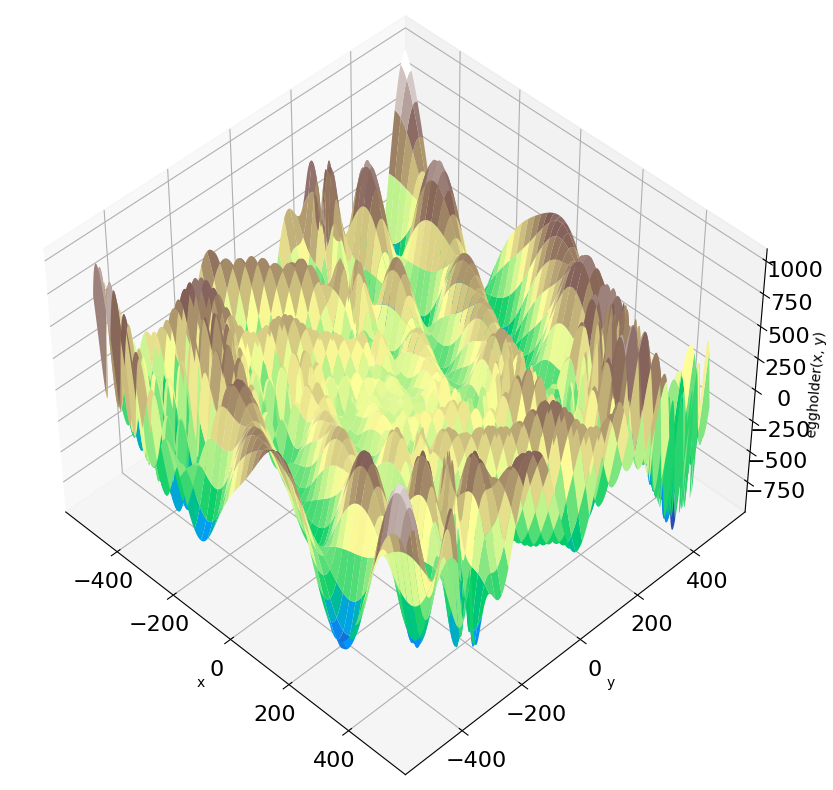

In [98]:
# RUN THIS
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize


def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))\
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')


* Use optimize.minimize to try to find the minimum
* try it 10 times with different starting guesses
* print out the minimum value, and the x, y location of the minimum
* since you already have the true function, get the minimum value 
* and the location of the minimum of your x, y grid

In [102]:
# YOUR CODE HERE

import scipy.stats as st
negLogLike = eggholder(xy)
print(negLogLike.min())

for i in range(10):
    guess = st.uniform.rvs(loc=-512, scale=1024, size=2)
    # YOUR CODE HERE
    res = optimize.minimize(eggholder,x0=guess)
    print(res.x, res.fun)
    
# What do you notice happens to the minimum value based on your starting guess?

-959.579671903256
[-123.72758328 -290.3183849 ] -362.4135512235212
[-465.69413884  385.71668723] -894.5789003905481
[-576.80349577 -324.53900307] -847.0659697839578
[  91.00921571 -391.28374777] -426.4879965472299
[-390.37392098 -415.09015289] -753.0501546930279
[442.1814702  -24.21658166] -443.49738405357573
[140.18064387  90.68869658] -272.60228594710793
[-162.8385508    96.13033083] -302.2816032832553
[-408.71977547 -156.10112707] -507.87385942084836
[-414.81569988   98.73012266] -557.8577790251135


## In class exercise - rejection sampling

In this exercise, we are going to estimate the value of $\pi$ using rejection sampling.

1. First, draw x, y points from a uniform distribution between 0 and 1. Use 3 sample sizes: [10, 10^3, 10^5]
2. Next, calculate $r = sqrt(x^2 + y^2)$ for each point. Reject the point if r > 1, else accept it.
3. Plot the accepted points in red and the rejected points in blue in the x-y plane
4. Finally, estimate $\pi$. Use the proportion of **accepted points / total points** and some algebra.

Here is an example of a plot for step 3:

![Example rejection sampling plot](figures/example_rejection_sampling_plot.png)

In [4]:
# YOUR CODE HERE

fig = plt.figure(figsize=(15,5))

for i, samp in enumerate([10, 1000, 100000]):
    ax = fig.add_subplot(1, 3, i+1)
    # YOUR CODE HERE
    x = ...
    y = ...
    r = ...
    mask = ...
    ax.scatter(x[mask], y[mask], color='blue')
    ax.scatter(x[~mask], y[~mask], color='red')
    print(4*len(r[~mask])/len(r))